# 國立高雄科技大學-財管系-114學年-統計學(一) 期末報告
# 投資組合分析入門：使用 Python 進行股票數據分析


**學習路徑**：
1. Python 基礎
2. Pandas 套件基礎
3. 讀取TEJ股票資料
4. 計算報酬率與敘述性統計
5. 資料視覺化：直方圖
6. 最終目標：相關係數與投資組合分析

## 單元一：Python 程式語言基礎

Python 是一種非常流行且語法簡單的程式語言。在財經分析中，我們用它來自動化處理和分析大量資料。

**變數**：可以想像成一個有名字的箱子，用來存放資料。例如，我們可以創建一個名為 `stock_name` 的變數來存放股票名字。

**基本運算**：Python 可以像計算機一樣進行加、減、乘、除等運算。

In [1]:
# 這是一個程式碼儲存格。點擊這裡，然後按下 Shift + Enter 來執行它。
# 「#」開頭的文字是註解，用來說明程式碼，不會被執行。

# 1. 變數賦值
stock_name = "台積電"  # 這是一個字串 (string)
stock_price = 600      # 這是一個整數 (integer)
weight = 0.5           # 這是一個浮點數 (float)

# 2. 使用 print() 函數顯示變數內容
print(stock_name)
print(stock_price)

# 3. 基本運算
a = 10
b = 20
c = a + b
print("a + b 的結果是:", c)

台積電
600
a + b 的結果是: 30


### ✍️ 單元一：小測驗

假設你買了 100 股價格為 580 元的股票，請用變數 `shares` 和 `price` 來儲存這兩個數字，並計算總成本 `total_cost`，最後將結果印出來。

In [2]:
# 請在下方撰寫你的答案
shares = 5000
price = 1390
total_cost = shares * price * 1.001425
print("總成本 + 上手續費為:", total_cost)

總成本 + 上手續費為: 6959903.75


## 單元二：Pandas 套件基礎

Pandas 是 Python 中最強大的資料分析工具，它提供了兩種核心的資料結構：`Series` 和 `DataFrame`。

- **Series**：可以想像成 Excel 中的「一欄」資料，它由一串資料和一組對應的索引（index）組成。
- **DataFrame**：可以想像成 Excel 中的「一張完整的表格」，它由多個 Series 組成，有行（row）有列（column）。我們之後處理的股票數據主要就是用 DataFrame 格式。

In [3]:
# 首先，我們需要「匯入」pandas 套件，並給它一個簡稱 pd
import pandas as pd

# 1. 創建一個 Series
s = pd.Series([1, 3, 5, 7, 9], name='奇數')
print("這是一個 Series:")
print(s)

print("\n" + "-" * 20 + "\n") # 分隔線

# 2. 創建一個 DataFrame
data = {
    '公司': ['台積電', '聯發科', '鴻海'],
    '股價': [600, 900, 100]
}
df = pd.DataFrame(data)

print("這是一個 DataFrame:")
print(df)

這是一個 Series:
0    1
1    3
2    5
3    7
4    9
Name: 奇數, dtype: int64

--------------------

這是一個 DataFrame:
    公司   股價
0  台積電  600
1  聯發科  900
2   鴻海  100


### ✍️ 單元二：小測驗

請建立一個包含三位學生（'小明', '小華', '小美'）和他們期中考成績（85, 92, 78）的 DataFrame，欄位名稱分別為 '姓名' 和 '成績'。

In [4]:
# 請在下方撰寫你的答案
student_data = {
    '姓名': ['小明', '小華', '小美'],
    '成績': [85, 92, 78],
    "操行": ["全", "缺", "缺"],
    "實習": ["元大", None, "國泰"],
}
student_df = pd.DataFrame(student_data)
print(student_df)

   姓名  成績 操行    實習
0  小明  85  全    元大
1  小華  92  缺  None
2  小美  78  缺    國泰


## 單元三：使用 Pandas 讀取TEJ股票資料

分析的第一步是取得資料。請至TEJ 下載 3 檔股票，期間近期3年內的報酬率%，並下載為csv 檔。

首先，如果你的環境中沒有這個套件，需要先安裝它。你可以在 Jupyter 的儲存格中執行以下命令（將 `#` 移除）：

In [5]:
# !pip install pandas

In [7]:
import pandas as pd

# 這裡的 encoding="cp950"是因為文字檔編碼問題，需要改為 cp950
stock_data = pd.read_csv("./tw-price.csv", encoding="cp950")

# 看看資料的基本資訊
print("下載的股價資料基本資訊:")
stock_data.info()

下載的股價資料基本資訊:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829 entries, 0 to 2828
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   證券代碼    2829 non-null   int64  
 1   簡稱      2829 non-null   object 
 2   年月日     2829 non-null   int64  
 3   報酬率％    2829 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 88.5+ KB


In [8]:
# 如果 報酬率％  不是 float ，就要進行型態轉換
def covertFloat(x):
    try:  return float(x)
    except:  return None
stock_data["報酬率％"] = stock_data["報酬率％"].apply(covertFloat)

### ✍️ 單元三：小測驗

請試著下載你們這組的股票，並顯示其最後五筆資料 (`.tail()`)。

In [9]:
# 請在下方撰寫你的答案
stock_data.head()

,證券代碼,簡稱,年月日,報酬率％
0,1102,亞泥,20220103,-0.6772
1,2498,宏達電,20220103,1.4151
2,2882,國泰金,20220103,-1.4400
3,1102,亞泥,20220104,-0.4545
4,2498,宏達電,20220104,-1.6279


## 單元四：計算個別報酬率的敘述性統計

先將3個股票分別指定出來，再來計算各自「敘述性統計」：
- `count`: 樣本數
- `mean`: 平均值 (代表平均報酬率)
- `std`: 標準差 (代表風險或波動性)
- `min`, `max`: 最小與最大值

In [12]:
# 1. 計算日報酬率
stock_ret_1 = stock_data[stock_data["證券代碼"] == 2498]

print("股票1：")
print(stock_ret_1.head())

股票1：
    證券代碼          簡稱       年月日    報酬率％
1   2498  宏達電         20220103  1.4151
4   2498  宏達電         20220104 -1.6279
7   2498  宏達電         20220105 -3.5461
10  2498  宏達電         20220106  0.4902
13  2498  宏達電         20220107 -4.8780


In [13]:
print("股票1 報酬率的敘述性統計:")
stats_1 = stock_ret_1["報酬率％"].describe()
print(stats_1)
print("--"*10)

股票1 報酬率的敘述性統計:
count    943.000000
mean      -0.018811
std        2.909064
min       -9.966200
25%       -1.595950
50%       -0.173000
75%        1.323000
max       10.000000
Name: 報酬率％, dtype: float64
--------------------


### ✍️ 單元四：小測驗

把3檔股票的敘述性統計都呈現出來

In [14]:
# 1. 計算日報酬率
stock_ret_1 = stock_data[stock_data["證券代碼"] == 2498]
stock_ret_2 = stock_data[stock_data["證券代碼"] == 2882]
stock_ret_3 = stock_data[stock_data["證券代碼"] == 1102]

# print("股票1：")
# print(stock_ret_1.head())
# print("--"*10)
# print("股票2：")
# print(stock_ret_2.head())
# print("--"*10)
# print("股票3：")
# print(stock_ret_3.head())
# print("--"*10)

print("股票1 報酬率的敘述性統計:")
stats_1 = stock_ret_1["報酬率％"].describe()
print(stats_1)
print("--"*10)
print("股票2 報酬率的敘述性統計:")
stats_2 = stock_ret_2["報酬率％"].describe()
print(stats_2)
print("--"*10)
print("股票3 報酬率的敘述性統計:")
stats_3 = stock_ret_3["報酬率％"].describe()
print(stats_3)
print("--"*10)

股票1 報酬率的敘述性統計:
count    943.000000
mean      -0.018811
std        2.909064
min       -9.966200
25%       -1.595950
50%       -0.173000
75%        1.323000
max       10.000000
Name: 報酬率％, dtype: float64
--------------------
股票2 報酬率的敘述性統計:
count    943.000000
mean       0.034759
std        1.541339
min       -9.902600
25%       -0.771000
50%        0.000000
75%        0.768600
max        9.899000
Name: 報酬率％, dtype: float64
--------------------
股票3 報酬率的敘述性統計:
count    943.000000
mean       0.013669
std        1.108026
min       -9.947100
25%       -0.557750
50%        0.000000
75%        0.579800
max        5.868800
Name: 報酬率％, dtype: float64
--------------------


## 單元五：資料視覺化：直方圖

數字雖然精確，但圖形能幫助我們更直觀地理解資料的分佈。直方圖 (Histogram) 是一種常見的圖表，用來顯示資料的頻率分佈。

我們將使用 `matplotlib` 這個套件來畫圖，它通常和 Pandas 搭配使用。

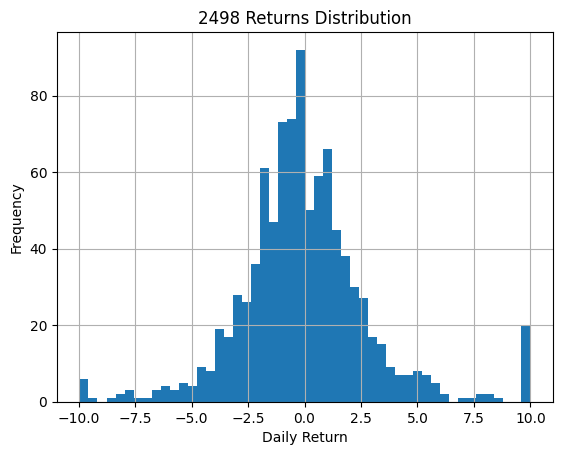

In [15]:
# 匯入 matplotlib 套件
import matplotlib.pyplot as plt

# 畫出股票報酬率的直方圖
# bins 參數決定了要把資料分成幾組
stock_ret_1["報酬率％"].hist(bins=50)

# 加上標題和標籤，讓圖表更清楚
plt.title('2498 Returns Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')

# 顯示圖表
plt.show()

### ✍️ 單元五：小測驗

請為妳其他股票的日報酬率數據繪製一張直方圖。

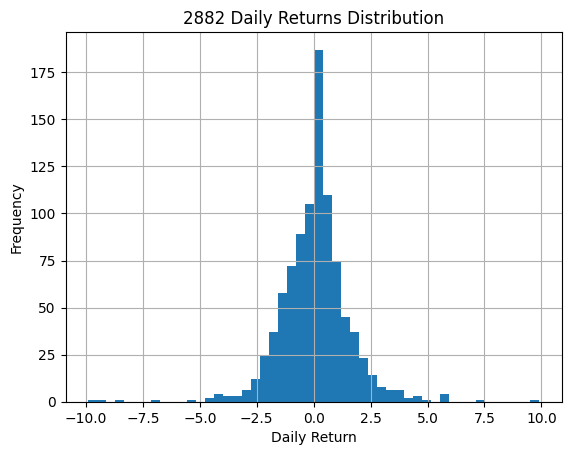

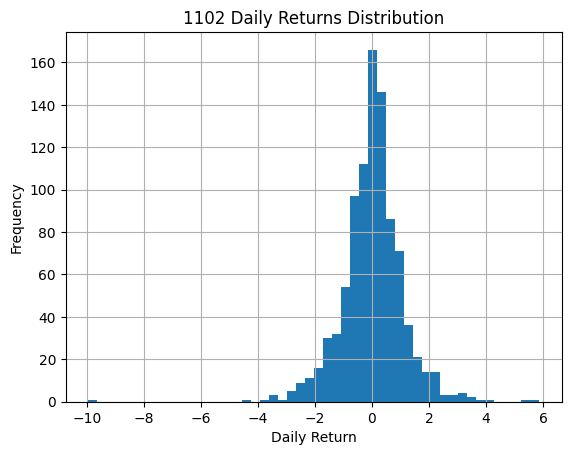

In [16]:
# 請在下方撰寫你的答案
stock_ret_2["報酬率％"].hist(bins=50)
plt.title('2882 Daily Returns Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

# 請在下方撰寫你的答案
stock_ret_3["報酬率％"].hist(bins=50)
plt.title('1102 Daily Returns Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

## 單元六：最終目標：相關係數與投資組合分析

恭喜你來到最後一個單元！現在我們要整合所有學到的知識，來進行真正的投資組合分析。

**1. 相關係數 (Correlation)**
相關係數衡量了兩個變數（在這裡是兩支股票的報酬率）一起變動的程度。範圍在 -1 到 1 之間。
- 接近 1：高度正相關，兩者傾向同漲同跌。
- 接近 -1：高度負相關，兩者傾向一漲一跌（有助於分散風險）。
- 接近 0：不相關。

**2. 投資組合報酬率與風險**
一個投資組合的預期報酬率是其成分資產預期報酬率的加權平均。
$$ E(R_p) = w_1 E(R_1) + w_2 E(R_2) + ... + w_n E(R_n) $$

投資組合的風險（標準差）計算則比較複雜，除了個別資產的風險，還需要考慮資產之間的「共變異數 (Covariance)」。
$$ \sigma_p^2 = \sum_{i=1}^n w_i^2 \sigma_i^2 + \sum_{i=1}^n \sum_{j=1, j \neq i}^n w_i w_j Cov(R_i, R_j) $$

我們將使用矩陣運算來簡化計算，並將結果「年化」，使其更具可比性（一般假設一年有 252 個交易日）。

# 將股票報酬率整理起來

In [17]:
import numpy as np

In [18]:
portfilo_rets = pd.DataFrame()
portfilo_rets[2498] = stock_ret_1["報酬率％"].values
portfilo_rets[2882] = stock_ret_2["報酬率％"].values
portfilo_rets[1102] = stock_ret_3["報酬率％"].values

In [19]:
portfilo_rets.describe()

,2498,2882,1102
count,943.000000,943.000000,943.000000
mean,-0.018811,0.034759,0.013669
std,2.909064,1.541339,1.108026
min,-9.966200,-9.902600,-9.947100
25%,-1.595950,-0.771000,-0.557750
50%,-0.173000,0.000000,0.000000
75%,1.323000,0.768600,0.579800
max,10.000000,9.899000,5.868800


In [20]:
#  相關係數矩陣
correlation_matrix = portfilo_rets.corr()
print("報酬率相關係數矩陣:")
print(correlation_matrix)

報酬率相關係數矩陣:
          2498      2882      1102
2498  1.000000  0.333890  0.187537
2882  0.333890  1.000000  0.365155
1102  0.187537  0.365155  1.000000


In [21]:
# 設定投資組合權重
# 假設我們採取平均分配的策略
weights = np.array([1/3, 1/3, 1/3])

In [22]:
# 計算年化投資組合報酬率
# 1. 先算每一檔股票的「平均日報酬」
annual_returns = portfilo_rets.mean()

# 2. 計算投資組合的「預期年化報酬率」
# 公式: Sum(權重 * 平均日報酬) * 252
portfolio_return = np.sum(weights * annual_returns) * 252

In [23]:
# 計算風險 (Risk / Volatility) ---
# 1. 計算「年化共變異數矩陣」 (Covariance Matrix)
# 這裡直接將日共變異數 * 252
cov_matrix_annual = portfilo_rets.cov() * 252

# 2. 計算投資組合的「年化變異數」 (Variance)
# 矩陣公式: weights_Transposed * CovMatrix * weights
portfolio_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))

# 3. 計算投資組合的「年化標準差」 (Standard Deviation，即風險)
portfolio_volatility = np.sqrt(portfolio_variance)

In [24]:
# ==========================================
# 4. 輸出結果
# ==========================================

print(f"設定權重: {weights}")
print("-" * 30)
print(f"投資組合預期年化報酬率 (Expected Return): {portfolio_return:.2%}")
print(f"投資組合年化風險 (Volatility/Risk):       {portfolio_volatility:.2%}")

# 額外資訊：夏普值 (假設無風險利率為 2%)
risk_free_rate = 0.02
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
print(f"預估夏普值 (Sharpe Ratio):                {sharpe_ratio:.2f}")

設定權重: [0.33333333 0.33333333 0.33333333]
------------------------------
投資組合預期年化報酬率 (Expected Return): 248.79%
投資組合年化風險 (Volatility/Risk):       2214.64%
預估夏普值 (Sharpe Ratio):                0.11


# 補充說明：用幾何平均
年化報酬率(幾何) = (1+ 每日報酬率)^252 - 1

In [ ]:
(np.pow(1+ np.sum(weights * annual_returns)/100, 252) -1 )*100

### ✍️ 加分題

請修改 `weights` 變數，為最是投資組合權重 (投組風險最下的情況下，投組期望報酬率最高)。
並說明你們這組是如何找到該權重分配的。